# Sistemas dinámicos, complejidad y caos con Python

*Esta notebook fue creada originalmente como un blog post por [Raúl E. López Briega](https://relopezbriega.com.ar/) en [Matemáticas, Analisis de datos y Python](https://relopezbriega.github.io). El contenido esta bajo la licencia BSD.*

<img alt="Sistemas dinámicos, complejidad y caos" title="Sistemas dinámicos, complejidad y caos" src="https://relopezbriega.github.io/images/ComplexPy.jpg" width="80%" height="80%">

> "Las nubes no son esferas, las montañas no son conos, las líneas costeras no son círculos, y la corteza no es lisa ni los rayos viajan en línea recta..."

**[Benoît Mandelbrot](https://es.wikipedia.org/wiki/Beno%C3%AEt_Mandelbrot)**

## Introducción

En el enfoque tradicional de la ciencia, se busca generalmente reducir a los sistemas complejos en cada una de sus partes constituyentes, y al comprender completamente cada parte, entonces podríamos entender todo el sistema. Pero ¿Es realmente esto correcto? ¿Comprender las partes del sistema nos dará una idea del todo? Si las partes son realmente independientes entre sí, incluso cuando las agreguemos deberíamos ser capaces de predecir y comprender estos sistemas *complejos*; pero a medida que las partes comienzan a conectarse e interactuar más entre sí, las bases científicas de este enfoque comienzan a fallar, y este *reduccionismo* ya no nos ayuda a comprender el mundo que nos rodea. 

In [1]:
# <!-- collapse=True -->
# Importando las librerías que vamos a utilizar
import pandas as pd
import numpy as np
from fractal import Fern, Sierpinski, Vicsek, Tree, Dragon, Koch, Hilbert, Levy

# graficos incrustados
%matplotlib inline

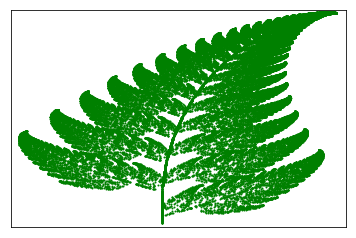

In [2]:
# Dibujar una hoja utilizando el juego del caos de Barnsley
fern = Fern()
fern.plot()

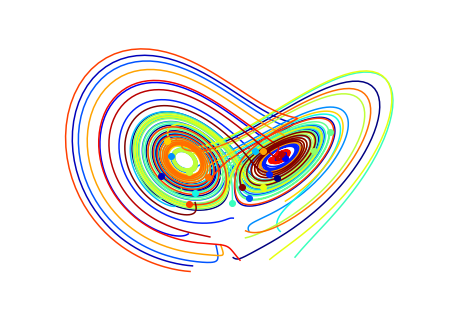

In [3]:
# <!-- collapse=True -->
N_trajectories = 20

def lorentz_deriv(x_y_z, t0, sigma=10., beta=8./3, rho=28.0):
    """Compute the time-derivative of a Lorentz system."""
    (x, y, z) = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# Choose random starting points, uniformly distributed from -15 to 15
np.random.seed(1)
x0 = -15 + 30 * np.random.random((N_trajectories, 3))

# Solve for the trajectories
t = np.linspace(0, 4, 1000)
x_t = np.asarray([integrate.odeint(lorentz_deriv, x0i, t)
                  for x0i in x0])

# Set up figure & 3D axis for animation
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')

# choose a different color for each trajectory
colors = plt.cm.jet(np.linspace(0, 1, N_trajectories))

# set up lines and points
lines = sum([ax.plot([], [], [], '-', c=c)
             for c in colors], [])
pts = sum([ax.plot([], [], [], 'o', c=c)
           for c in colors], [])

# prepare the axes limits
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

# set point-of-view: specified by (altitude degrees, azimuth degrees)
ax.view_init(30, 0)

# initialization function: plot the background of each frame
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

# animation function.  This will be called sequentially with the frame number
def animate(i):
    # we'll step two time-steps per frame.  This leads to nice results.
    i = (2 * i) % x_t.shape[1]

    for line, pt, xi in zip(lines, pts, x_t):
        x, y, z = xi[:i].T
        line.set_data(x, y)
        line.set_3d_properties(z)

        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])

    ax.view_init(30, 0.3 * i)
    fig.canvas.draw()
    return lines + pts

# instantiate the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=30, blit=True)

# Save as mp4. This requires mplayer or ffmpeg to be installed
anim.save('lorentz_attractor.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

plt.show()

In [10]:
%%HTML
<video width="320" height="240" controls>
  <source src="https://relopezbriega.github.io/images/lorentz_attractor.mp4" type="video/mp4">
</video>

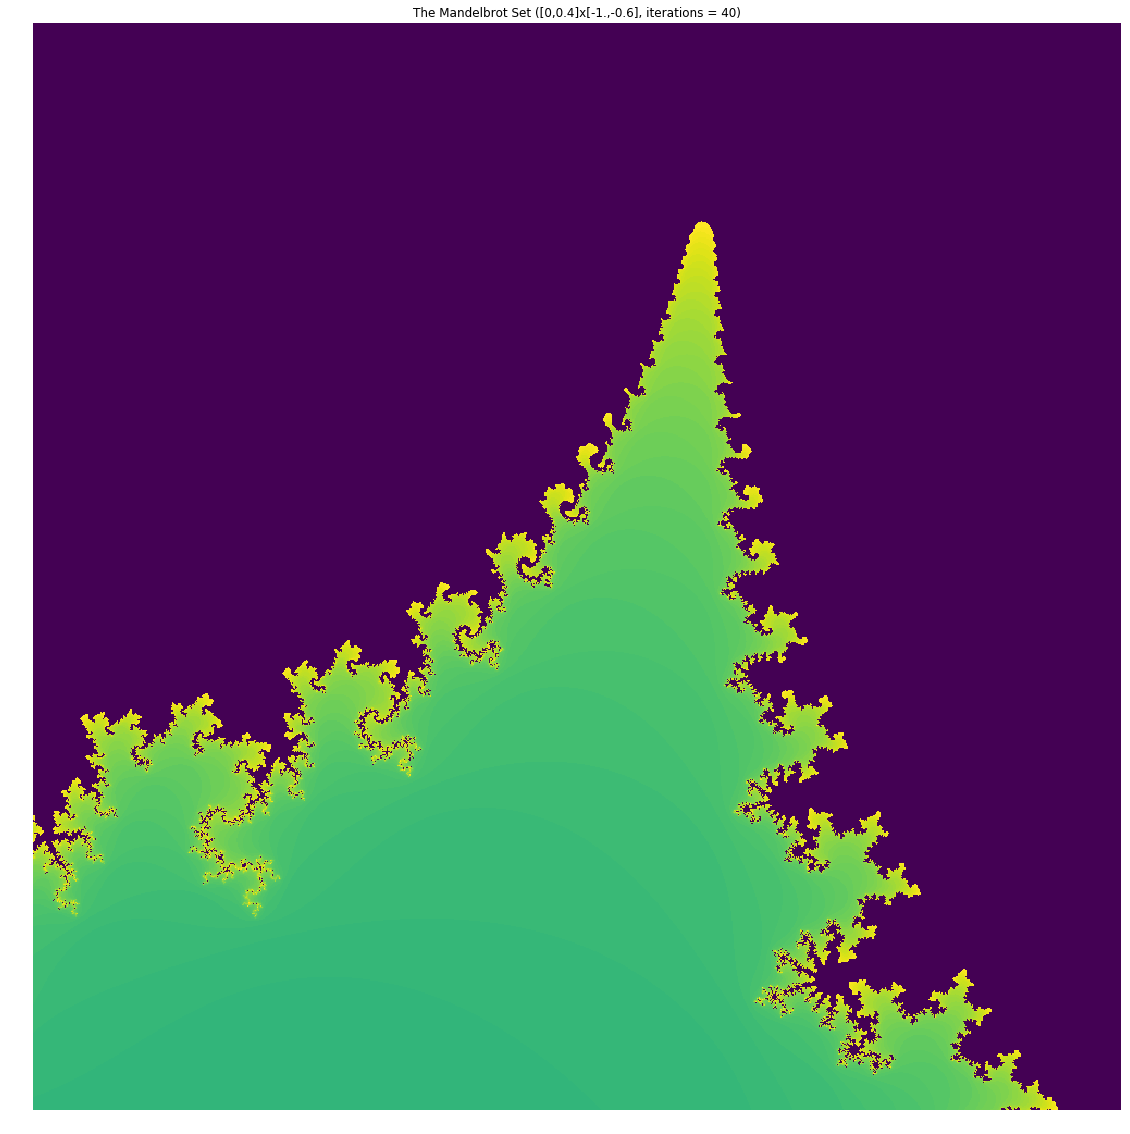

In [21]:
# <!-- collapse=True -->
def mandelbrot( h,w, maxit=40): #20
        '''
        Returns an image of the Mandelbrot fractal of size (h,w).
        '''
        y,x = ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
        #y,x = ogrid[ -0.25:0.25:h*1j, -1.8:-1.3:w*1j ]
        #y,x = ogrid[ -0.05:0.05:h*1j, -1.5:-1.4:w*1j ]
        c = x+y*1j
        z = c
        divtime = maxit + np.zeros(z.shape, dtype=int)
        for i in xrange(maxit):
                z  = z**2 + c
                diverge = z*conj(z) > 2**2            # who is diverging
                div_now = diverge & (divtime==maxit)  # who is diverging now
                divtime[div_now] = i  +100                # note when
                z[diverge] = 2                        # avoid diverging too much

        return divtime
def mandelbrot2( h,w,a=-2.,b=.8,c=-1.4,d=1.4, maxit=40): #20
        '''
        Returns an image of the Mandelbrot fractal of size (h,w).
        '''
        y,x = np.ogrid[ c:d:h*1j, a:b:w*1j ]
        # y,x = ogrid[ -0.25:0.25:h*1j, -1.8:-1.3:w*1j ]
        #y,x = ogrid[ -0.05:0.05:h*1j, -1.5:-1.4:w*1j ]
        c = x+y*1j
        z = c
        divtime = maxit + np.zeros(z.shape, dtype=int)
        for i in range(maxit):
                z  = z**2 + c
                diverge = z*np.conj(z) > 2**2            # who is diverging
                div_now = diverge & (divtime==maxit)  # who is diverging now
                divtime[div_now] = i  +100                # note when
                z[diverge] = 2                        # avoid diverging too much

        return divtime

#fig = plt.figure(figsize=(15,15))
plt.figure(figsize=(20,20))

#fig = plt.subplot(4,1,1)#,figsize=(20,20))

plt.imshow(mandelbrot2(1000,1000)) 
#s = "The Mandelbrot Set ([-2.0,0.8]x[-1.4,1.4], iterations = 40)"
#s = "The Mandelbrot Set ([-1.8,-1.3]x[-0.25,0.25], iterations = 40)"
s = "The Mandelbrot Set ([-1.5,-1.4]x[-0.05,0.05], iterations = 40)" 
#plt.subplot(4,1,1).
plt.title(s)
plt.axis('off')

##fig = plt.figure(figsize=(15,15))
##fig = plt.subplot(4,1,2)

# plt.figure(figsize=(20,20))

# plt.imshow(mandelbrot2(1000,1000,-1.8,-1.3,-.25,0.25)) 
# s = "The Mandelbrot Set ([-1.8,-1.3]x[-0.25,0.25], iterations = 40)"
# #plt.subplot(4,1,2).
# plt.title(s)
# plt.axis('off')

# plt.figure(figsize=(20,20))

# #fig = plt.figure(figsize=(15,15))
# #fig = plt.subplot(4,1,3)

# plt.imshow(mandelbrot2(1000,1000,-1.5,-1.4,-0.05,0.05)) 
# s = "The Mandelbrot Set ([-1.5,-1.4]x[-0.05,0.05], iterations = 40)"
# #plt.subplot(4,1,3).
# plt.title(s)
# plt.axis('off')

# plt.figure(figsize=(20,20))

#fig = plt.figure(figsize=(15,15))
#fig = plt.subplot(4,1,4)

plt.imshow(mandelbrot2(1000,1000,-1.,-.6,0.,0.4)) 
s = "The Mandelbrot Set ([0,0.4]x[-1.,-0.6], iterations = 40)"
#plt.subplot(4,1,4).
plt.title(s)
plt.axis('off')



plt.show()

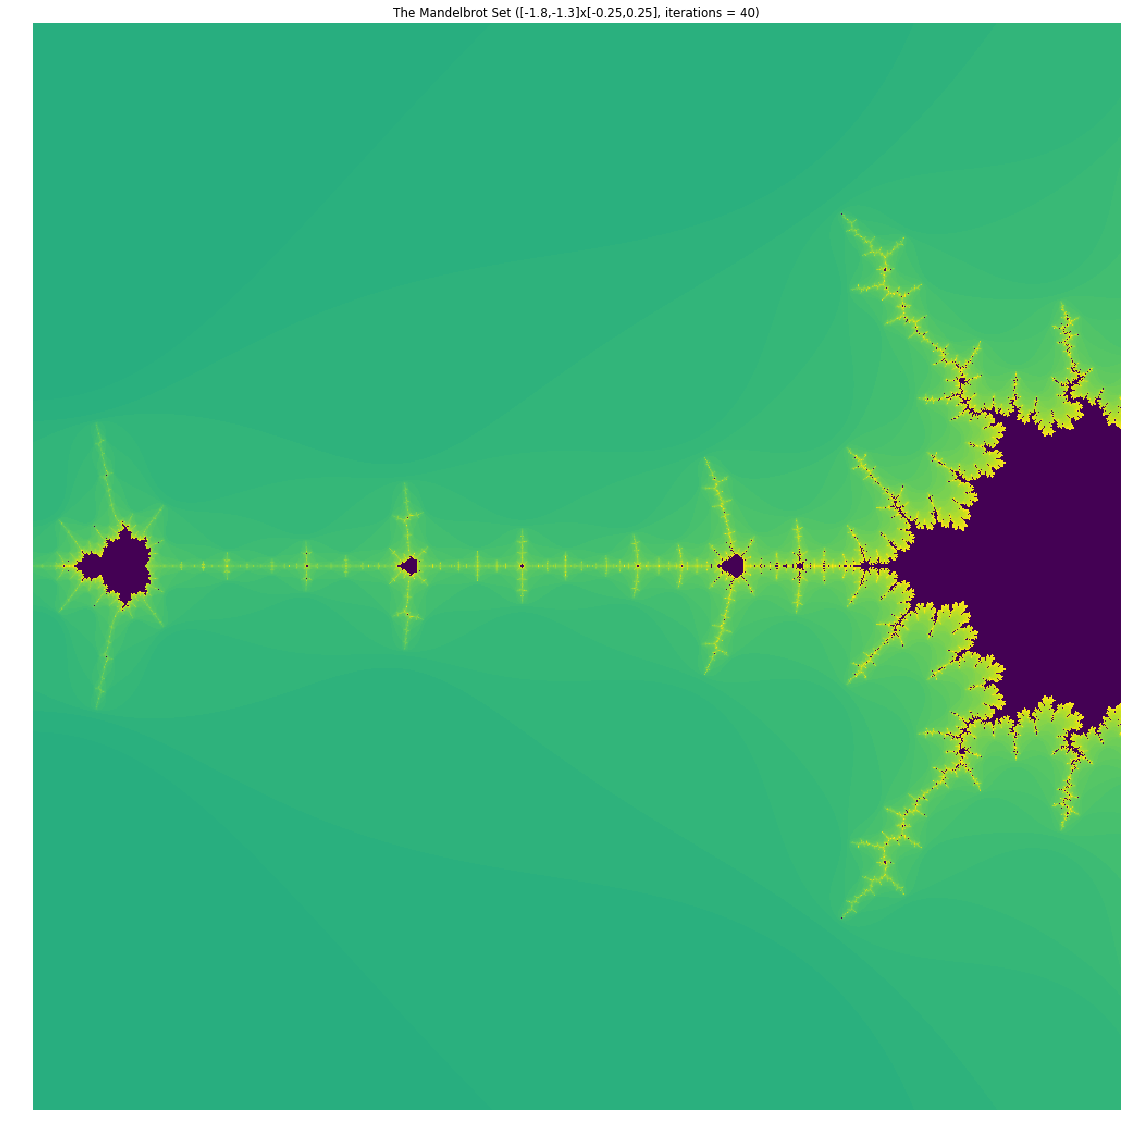

In [27]:
# <!-- collapse=True -->
plt.figure(figsize=(20,20))

plt.imshow(mandelbrot2(1000,1000,-1.8,-1.3,-.25,0.25)) 
s = "The Mandelbrot Set ([-1.8,-1.3]x[-0.25,0.25], iterations = 40)"
plt.title(s)
plt.axis('off')
plt.show()

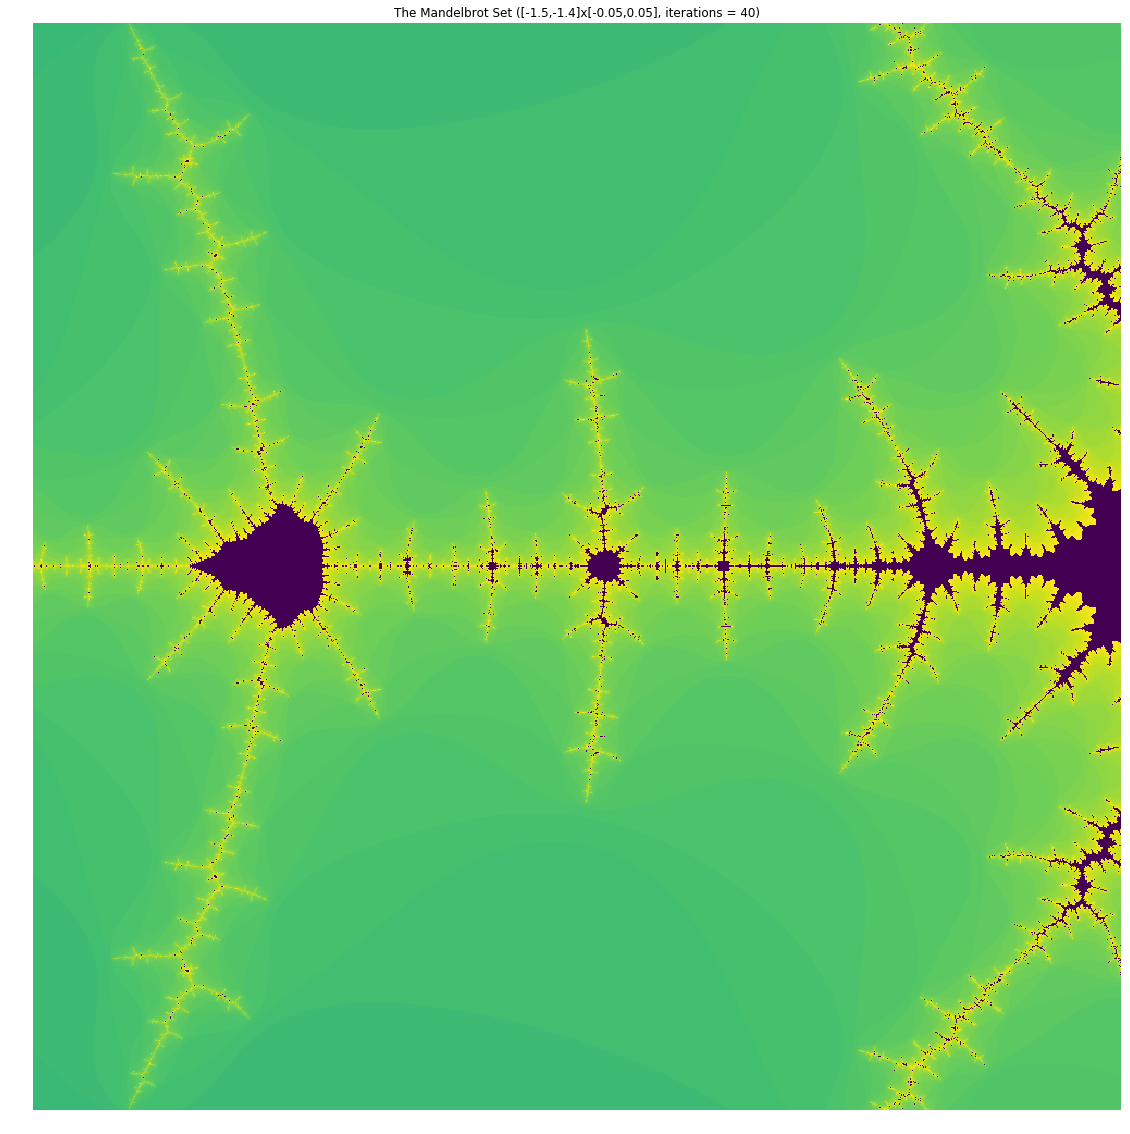

In [28]:
# <!-- collapse=True -->
plt.figure(figsize=(20,20))

plt.imshow(mandelbrot2(1000,1000,-1.5,-1.4,-0.05,0.05)) 
s = "The Mandelbrot Set ([-1.5,-1.4]x[-0.05,0.05], iterations = 40)"
plt.title(s)
plt.axis('off')
plt.show()

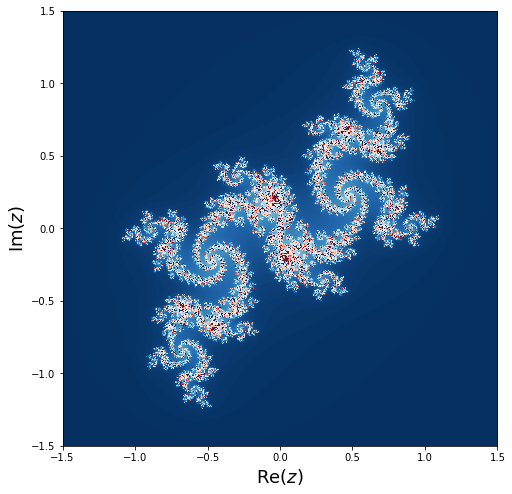

In [31]:
# <!-- collapse=True -->
# Graficando el fractal de Julia
def py_julia_fractal(z_re, z_im, j):
    '''Crea el grafico del fractal de Julia.'''
    for m in range(len(z_re)):
        for n in range(len(z_im)):
            z = z_re[m] + 1j * z_im[n]
            for t in range(256):
                z = z ** 2 - 0.05 + 0.68j
                if np.abs(z) > 2.0:
                    j[m, n] = t
                    break
                    
jit_julia_fractal = numba.jit(nopython=True)(py_julia_fractal)

N = 1024
j = np.zeros((N, N), np.int64)
z_real = np.linspace(-1.5, 1.5, N)
z_imag = np.linspace(-1.5, 1.5, N)
jit_julia_fractal(z_real, z_imag, j)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(j, cmap=plt.cm.RdBu_r, extent=[-1.5, 1.5, -1.5, 1.5])
ax.set_xlabel("$\mathrm{Re}(z)$", fontsize=18)
ax.set_ylabel("$\mathrm{Im}(z)$", fontsize=18)
plt.show()

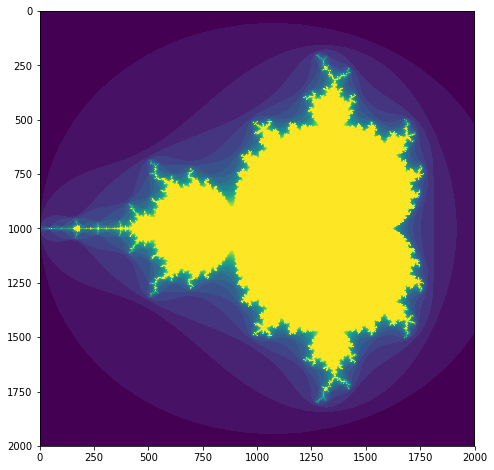

In [32]:
# <!-- collapse=True -->
# Graficando el conjunto de Mandelbrot 
def mandelbrot( h,w, maxit=20 ):
    '''Crea el grafico del fractal de Mandelbrot del tamaño (h,w).'''
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)
    
    for i in range(maxit):
        z  = z**2 + c
        diverge = z*np.conj(z) > 2**2         
        div_now = diverge & (divtime==maxit)  
        divtime[div_now] = i                  
        z[diverge] = 2                        
        
    return divtime

plt.figure(figsize=(8,8))
plt.imshow(mandelbrot(2000,2000))
plt.show()